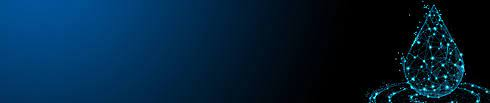

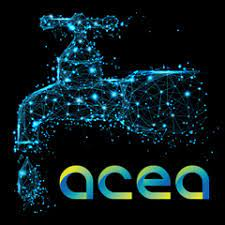

# Acea Smart Water (Aquifer Petrignano)

Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in Italy.In this dataset our focus is to preserve precious waterbodies of Acea.The Acea Group deals with four different type of waterbodies: water springs, lakes, rivers and aquifers. 
But our dataset of interest is Petrignano. 
**Waterbody: Petrignano**
**Type: Aquifer**
The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.

# Introduction

This step focuses on collecting the data, organizing it, and making sure it's well defined. 

# Overview of Data

In this notebook, we will learn how to work with and predict time series. Time series are a collection of time-dependent data points. That means each data point is assigned to a specific timestamp. Ideally, these data points are in chronological order and in constant time intervals (e.g. every minute or everyday). The time series forecasting problem analyzes patterns in the past data to make predictions about the future. In contrast to regression problems, time series are time-dependent and show specific characteristics, such as trend and seasonality.

## Problem Definition

For this tutorial, we will build a model to predict the depth to groundwater of an aquifer located in Petrignano, Italy. The question we want to answer is

What is the future depth to groundwater of a well belonging to the aquifier in Petrigrano over the next 365 days?

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load The Aquifer Petrignano Dataset

In [2]:
df = pd.read_csv("RawData/Aquifer_Petrignano.csv")

In [3]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


**Features:**
1. Rainfall indicates the quantity of rain falling (mm)
2. Temperature indicates the temperature (°C)
3. Volume indicates the volume of water taken from the drinking water treatment plant (m 3 )
4. Hydrometry indicates the groundwater level (m)

Target:
Depth to Groundwater indicates the groundwater level (m from the ground floor)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


There are 5223 rows and 8 columns in datset

In [5]:
df.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
std,5.217923,3.319858,3.214165,7.794871,7.701369,4751.864371,0.589088
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.250000,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,0.000000,-25.990000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,67.300000,-19.660000,-19.100000,33.000000,31.100000,0.000000,4.100000


our target variable Depth_to_Groundwater_P25, mean depth of underground water is -25.69 and maximum depth is -33.71 and minimum depth is 19.10

In [6]:
df['Rainfall_Bastia_Umbra'].value_counts().head()

0.0    3147
0.2     139
0.1      64
0.4      46
0.6      42
Name: Rainfall_Bastia_Umbra, dtype: int64

In [7]:
df['Depth_to_Groundwater_P24'].value_counts().head()

-27.13    18
-27.16    15
-23.71    14
-26.96    14
-24.77    14
Name: Depth_to_Groundwater_P24, dtype: int64

In [8]:
df['Depth_to_Groundwater_P25'].value_counts().head()

-26.45    18
-26.38    18
-26.36    17
-26.24    16
-26.26    15
Name: Depth_to_Groundwater_P25, dtype: int64

In [9]:
df.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

After reviewing the dataset get to know there r 1024 missing values in columns Rainfall_Bastia_Umbra, Temperature_Bastia_Umbra, Temperature_Petrignano, Hydrometry_Fiume_Chiascio_Petrignano and 198 value is missing in column Volume_C10_Petrignano.Few value is missing in column Depth_to_Groundwater_P24, Depth_to_Groundwater_P25.  

### Heatmap of missing value

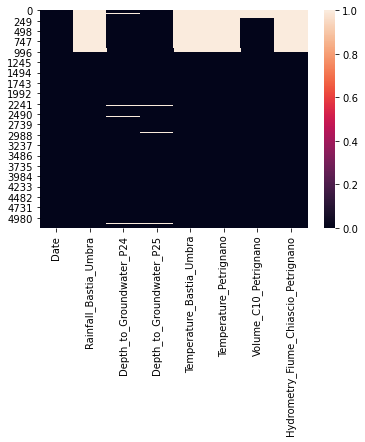

In [10]:
sns.heatmap(df.isnull())
plt.savefig('image/Figure1. Depth_to_Groundwater_P241.png', format='png') 

In [11]:
pd.set_option('max_rows', None)
df[0:1025][:]


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
5,19/03/2006,NaN,-22.35,-21.95,NaN,NaN,NaN,NaN
6,20/03/2006,NaN,-22.50,-21.99,NaN,NaN,NaN,NaN
7,21/03/2006,NaN,-22.31,-21.89,NaN,NaN,NaN,NaN
8,22/03/2006,NaN,-22.31,-21.82,NaN,NaN,NaN,NaN
9,23/03/2006,NaN,-22.40,-21.89,NaN,NaN,NaN,NaN


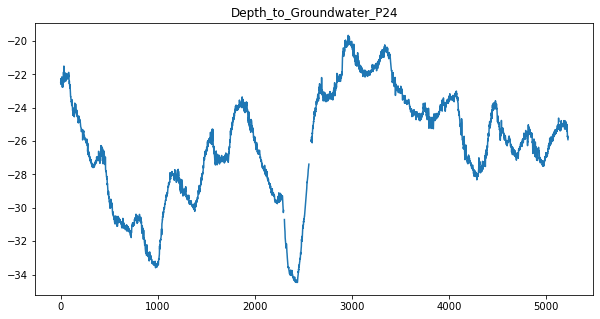

In [12]:
plt.figure(1,figsize = (10,5))
plt.plot(df["Depth_to_Groundwater_P24"])
plt.title("Depth_to_Groundwater_P24")
plt.savefig('image/Figure2. Depth_to_Groundwater_P241.png', format='png') #save figure

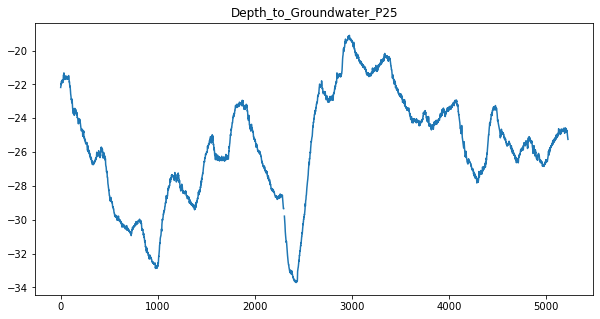

In [13]:
plt.figure(1,figsize = (10,5))
plt.plot(df["Depth_to_Groundwater_P25"])
plt.title("Depth_to_Groundwater_P25")
plt.savefig('image/Figure3. Depth_to_Groundwater_P252.png', format='png') # Save fig

In [14]:
#Drop one of the target columns, so we can focus on only one target
df = df.drop(['Depth_to_Groundwater_P24'], axis=1)

**Get rid of nan value and create new DataFrame**

In [15]:
df = df.copy()#Deep copy of DataFrame
#new DataFrame from 1024 row
Aquifier_Petrignano_1 = df.iloc[1024:,:] #Drop data before 2009 for the purpose of this tutorial

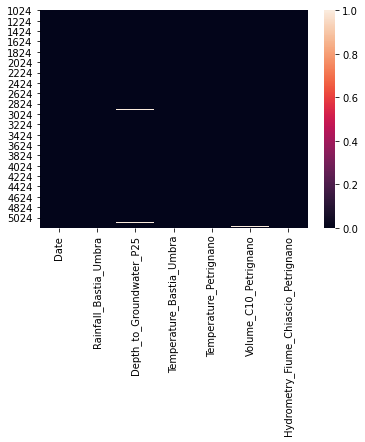

In [16]:
sns.heatmap(Aquifier_Petrignano_1.isnull())
plt.savefig('image/Figure4. Depth_to_Groundwater_P241.png', format='png') 

**Interpolating missing values**

In [17]:
Aquifier_Petrignano_1.isnull().sum()

Date                                     0
Rainfall_Bastia_Umbra                    0
Depth_to_Groundwater_P25                27
Temperature_Bastia_Umbra                 0
Temperature_Petrignano                   0
Volume_C10_Petrignano                    1
Hydrometry_Fiume_Chiascio_Petrignano     0
dtype: int64

now we have only 27 missing value in column Depth_to_Groundwater and only 1 missing value in column Drainage_Volume

### Rename of columns for easy understanding

In [18]:
# Simplify column names
Aquifier_Petrignano_1.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature_Bastia_Umbra', 'Temperature_Petrignano', 'Drainage_Volume', 'River_Hydrometry']

#targets = ['Depth_to_Groundwater']


In [19]:
Aquifier_Petrignano_1.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature_Bastia_Umbra,Temperature_Petrignano,Drainage_Volume,River_Hydrometry
1024,01/01/2009,0.0,-31.14,5.2,4.9,-24530.688,2.4
1025,02/01/2009,0.0,-31.11,2.3,2.5,-28785.888,2.5
1026,03/01/2009,0.0,-31.07,4.4,3.9,-25766.208,2.4
1027,04/01/2009,0.0,-31.05,0.8,0.8,-27919.296,2.4
1028,05/01/2009,0.0,-31.01,-1.9,-2.1,-29854.656,2.3


In [20]:
Aquifier_Petrignano_1['Drainage_Volume'].value_counts().head()

 0.000        25
-26127.360     4
-27076.032     4
-26257.824     3
-29742.336     3
Name: Drainage_Volume, dtype: int64

Drainage_volume is 0 in 25 rows

In [21]:
Aquifier_Petrignano_1['River_Hydrometry'].value_counts()

2.0    574
2.4    419
2.5    413
2.7    378
2.3    368
2.6    332
2.8    269
2.1    234
2.2    222
2.9    216
1.9    181
0.0    150
3.0    145
3.1     91
3.2     53
1.8     48
3.3     33
3.4     25
3.5     14
3.6     12
3.7     11
3.8      6
4.0      2
3.9      2
4.1      1
Name: River_Hydrometry, dtype: int64

150 rows has 0 value in River_Hydrometry 

In [22]:
Aquifier_Petrignano_1['Depth_to_Groundwater'].isnull().sum()

27

Since we are working with time series, the most essential features are the time related feature. In this example, we have the column Date which uniquely identifies a day. Ideally, the data is already in chronological order and the time stamps are equidistant in time series. This is already the case in our data: The time interval is one day and the data is already in chronological order. Therefore, we do not have to do this additional data preparation step.

This column is provided in string format. Let's convert it to the datetime64[ns] data type.

In [23]:
from datetime import datetime, date 

Aquifier_Petrignano_1['Date'] = pd.to_datetime(df.Date, format = '%d/%m/%Y')
Aquifier_Petrignano_1.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})


E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Rainfall,Depth_to_Groundwater,Temperature_Bastia_Umbra,Temperature_Petrignano,Drainage_Volume,River_Hydrometry
1024,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,4.900000,-24530.688000,2.400000
1025,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,2.500000,-28785.888000,2.500000
1026,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,3.900000,-25766.208000,2.400000
1027,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,0.800000,-27919.296000,2.400000
1028,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-2.100000,-29854.656000,2.300000


In [24]:
print(Aquifier_Petrignano_1.Date.dtype)

datetime64[ns]


### Checking Missing Value

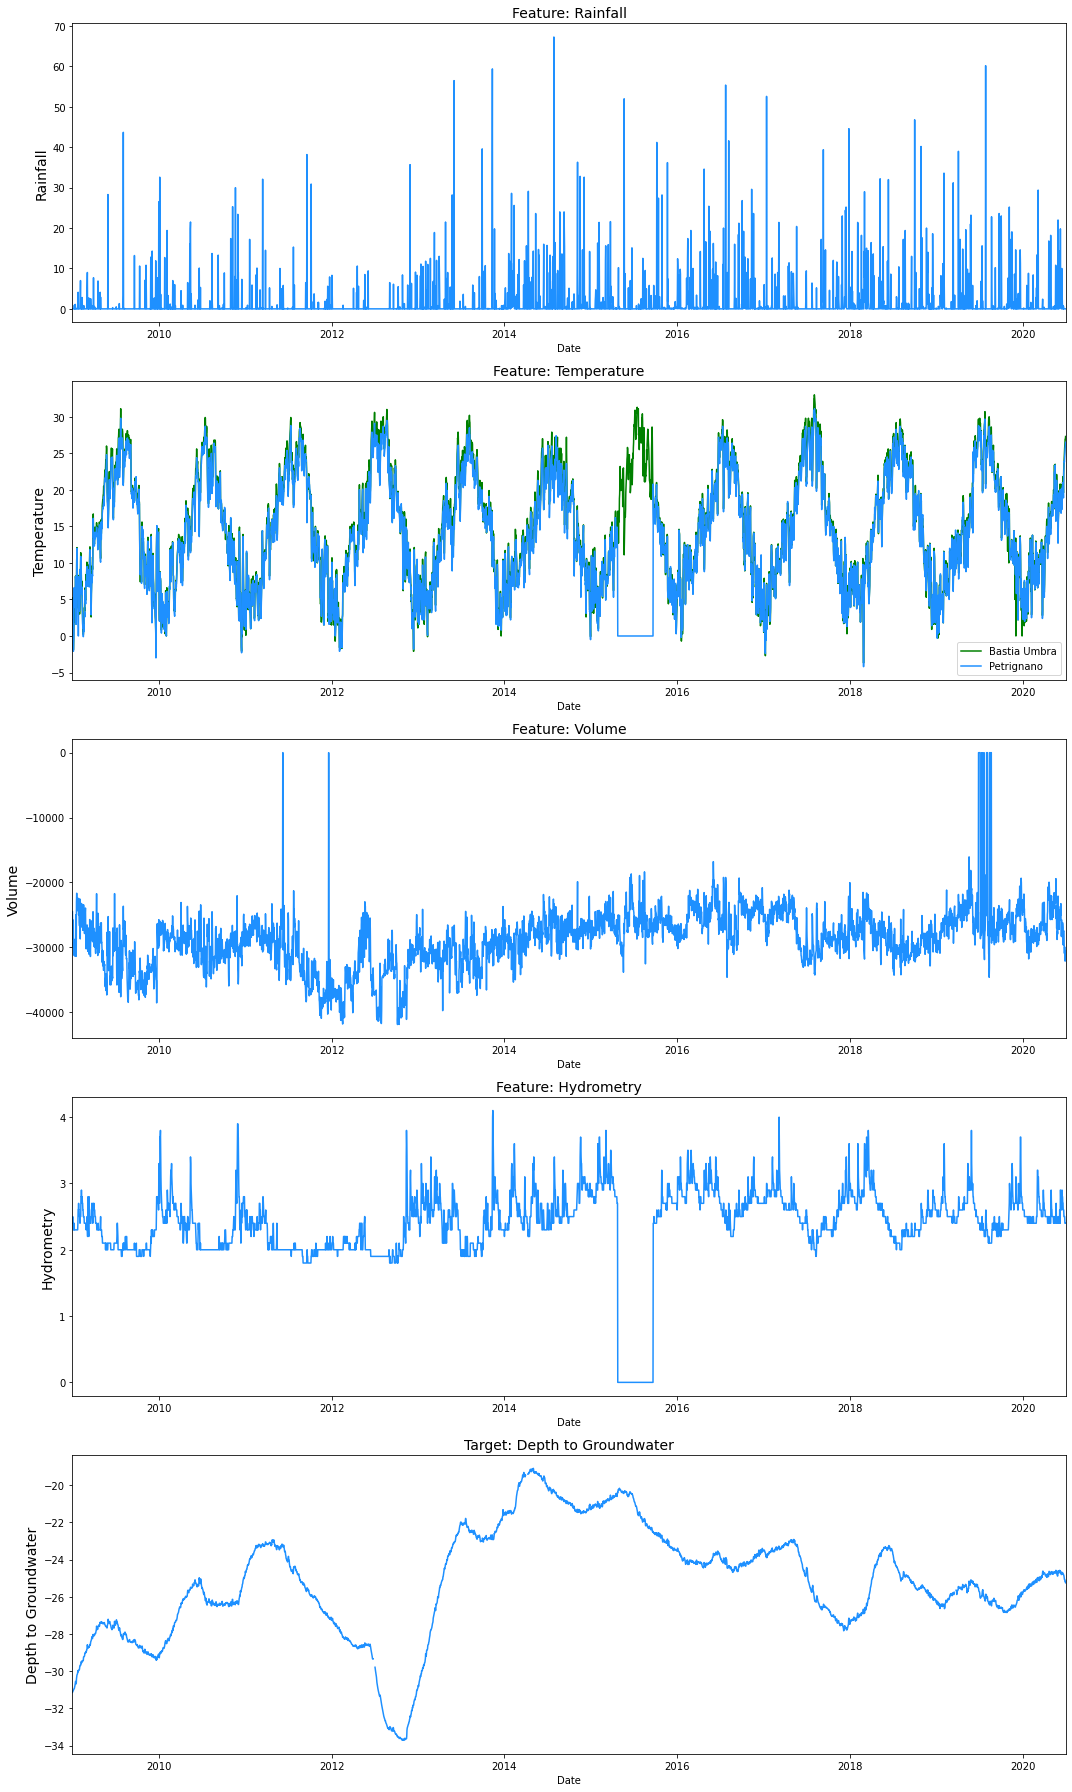

In [25]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Rainfall.fillna(np.inf), ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: Rainfall', fontsize=14)
ax[0].set_ylabel(ylabel='Rainfall', fontsize=14)

sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Temperature_Bastia_Umbra.fillna(np.inf), ax=ax[1], color='green',label='Bastia Umbra')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Temperature_Petrignano.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'Petrignano')
ax[1].set_title('Feature: Temperature', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)


sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Drainage_Volume.fillna(np.inf), ax=ax[2], color='dodgerblue')
ax[2].set_title('Feature: Volume', fontsize=14)
ax[2].set_ylabel(ylabel='Volume', fontsize=14)


sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.River_Hydrometry.fillna(np.inf), ax=ax[3], color='dodgerblue')
ax[3].set_title('Feature: Hydrometry', fontsize=14)
ax[3].set_ylabel(ylabel='Hydrometry', fontsize=14)


ax[4].set_title('Target: Depth to Groundwater', fontsize=14)
ax[4].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Depth_to_Groundwater.fillna(np.inf), ax=ax[4], color='dodgerblue')

plt.savefig('image/Figure5. Depth_to_Groundwater_P252.png', format='png') # Save fig

for i in range(5):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()




### Chronological Order and Equidistant Timestamps

The data should be in chronological order and the timestamps should be equidistant in time series. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.

But, first of all, lets see how to check if our dataset is correctly formated!

In [26]:
Aquifier_Petrignano_1 = Aquifier_Petrignano_1.sort_values(by='Date')

# Check time intervals
Aquifier_Petrignano_1['delta'] = Aquifier_Petrignano_1['Date'] - Aquifier_Petrignano_1['Date'].shift(1)

Aquifier_Petrignano_1[['Date', 'delta']].head()

,Date,delta
1024,2009-01-01,NaT
1025,2009-01-02,1 days
1026,2009-01-03,1 days
1027,2009-01-04,1 days
1028,2009-01-05,1 days


### Handling Missing Values

We can see that Depth_to_Groundwater has missing values.

Furthermore, plotting the time series reveals that there seem to be some implausible zero values for Drainage_Volume, and River_Hydrometry. We will have to clean them by replacing them by nan values and filling them afterwards.

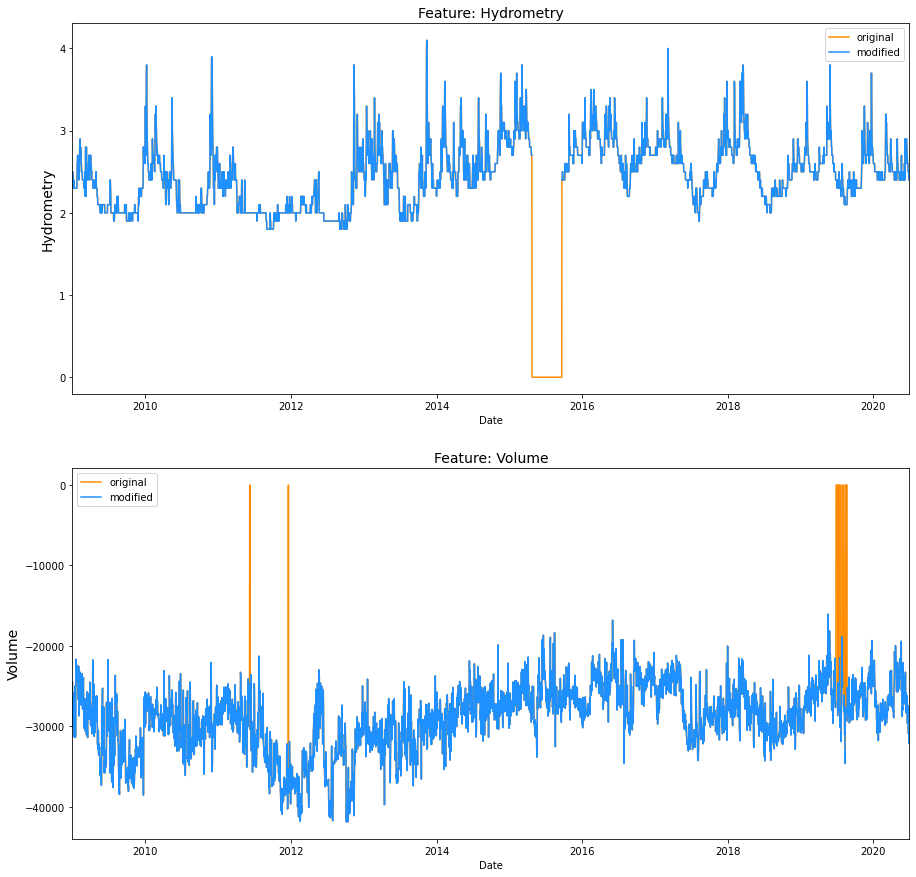

In [27]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
old = Aquifier_Petrignano_1.River_Hydrometry.copy()
Aquifier_Petrignano_1['River_Hydrometry'] = np.where((Aquifier_Petrignano_1.River_Hydrometry == 0),np.nan, Aquifier_Petrignano_1.River_Hydrometry)

sns.lineplot(x=Aquifier_Petrignano_1.Date, y=old.fillna(np.inf), ax=ax[0], color='darkorange', label = 'original')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.River_Hydrometry.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)

old = Aquifier_Petrignano_1.Drainage_Volume.copy()
Aquifier_Petrignano_1['Drainage_Volume'] = np.where((Aquifier_Petrignano_1.Drainage_Volume == 0),np.nan, Aquifier_Petrignano_1.Drainage_Volume)

sns.lineplot(x=Aquifier_Petrignano_1.Date, y=old.fillna(np.inf), ax=ax[1], color='darkorange', label = 'original')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Drainage_Volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'modified')
ax[1].set_title('Feature: Volume', fontsize=14)
ax[1].set_ylabel(ylabel='Volume', fontsize=14)

plt.savefig('image/Figure6. Hydrometry & Volume.png', format='png') # Save figure

for i in range(2):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.show()

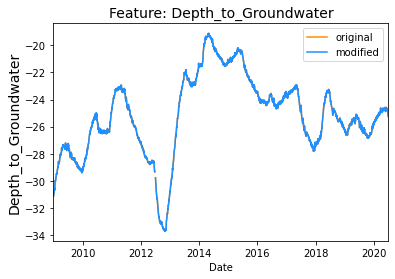

In [28]:
#f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
old = Aquifier_Petrignano_1.Depth_to_Groundwater.copy()

Aquifier_Petrignano_1['Depth_to_Groundwater'] = np.where((Aquifier_Petrignano_1.Drainage_Volume == 0),np.nan, Aquifier_Petrignano_1.Depth_to_Groundwater)

sns.lineplot(x=Aquifier_Petrignano_1.Date, y=old.fillna(np.inf), color='darkorange', label = 'original')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Depth_to_Groundwater.fillna(np.inf),color='dodgerblue', label = 'modified')
plt.title('Feature: Depth_to_Groundwater', fontsize=14)
plt.ylabel(ylabel='Depth_to_Groundwater', fontsize=14)

plt.xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.savefig('image/Figure7. Depth_to_Groundwater.png', format='png') # Save figure


plt.show()

Now we have to think what to do with missing values

<AxesSubplot:>

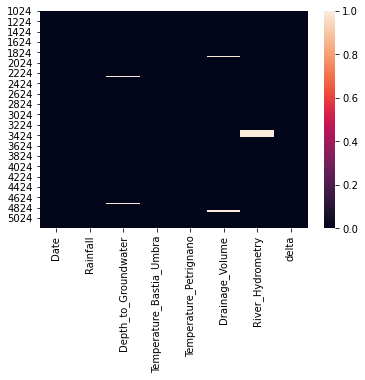

In [29]:
sns.heatmap(Aquifier_Petrignano_1.isnull())

Option 1: Fill NaN with Outlier or Zero

In this specific example filling the missing value with an outlier value such as -999 is not a good idea. 

Option 2: Fill NaN with Mean Value

Also in this example, we can see that filling NaNs with the mean value is also not sufficient.

Option 3: Fill NaN with Last Value with .ffill()

Filling NaNs with the last value is already a little bit better in this case.

Option 4: Fill NaN with Linearly Interpolated Value with .interpolate()

Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring values.

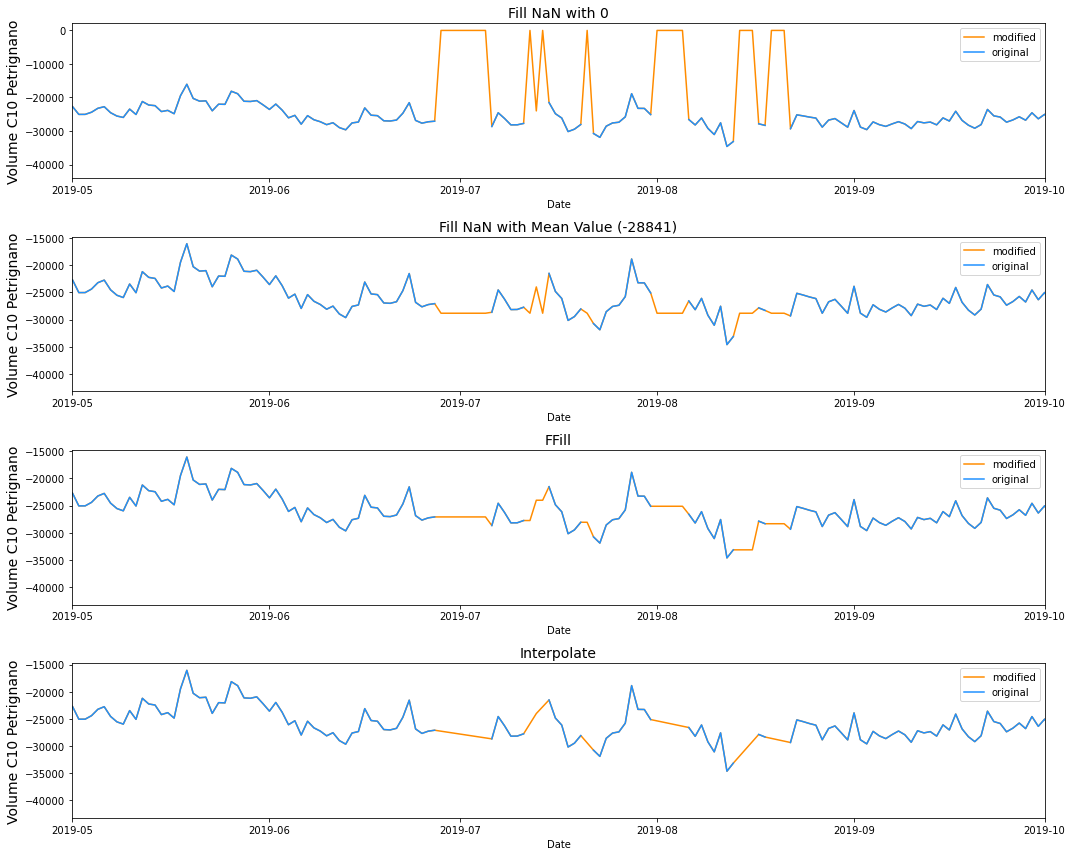

In [30]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Drainage_Volume.fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Drainage_Volume.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_val = Aquifier_Petrignano_1.Drainage_Volume.mean()
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Drainage_Volume.fillna(mean_val), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Drainage_Volume.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_val:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Drainage_Volume.ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Drainage_Volume.fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)


sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Drainage_Volume.interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Drainage_Volume.fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)
plt.savefig('image/Figure8. Depth_to_Groundwater.png', format='png') # Save figure

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
plt.tight_layout()
plt.show()

As we can see, the best option in this case, is interpolate

### Fill nan value in Depth_to_Groundwater column

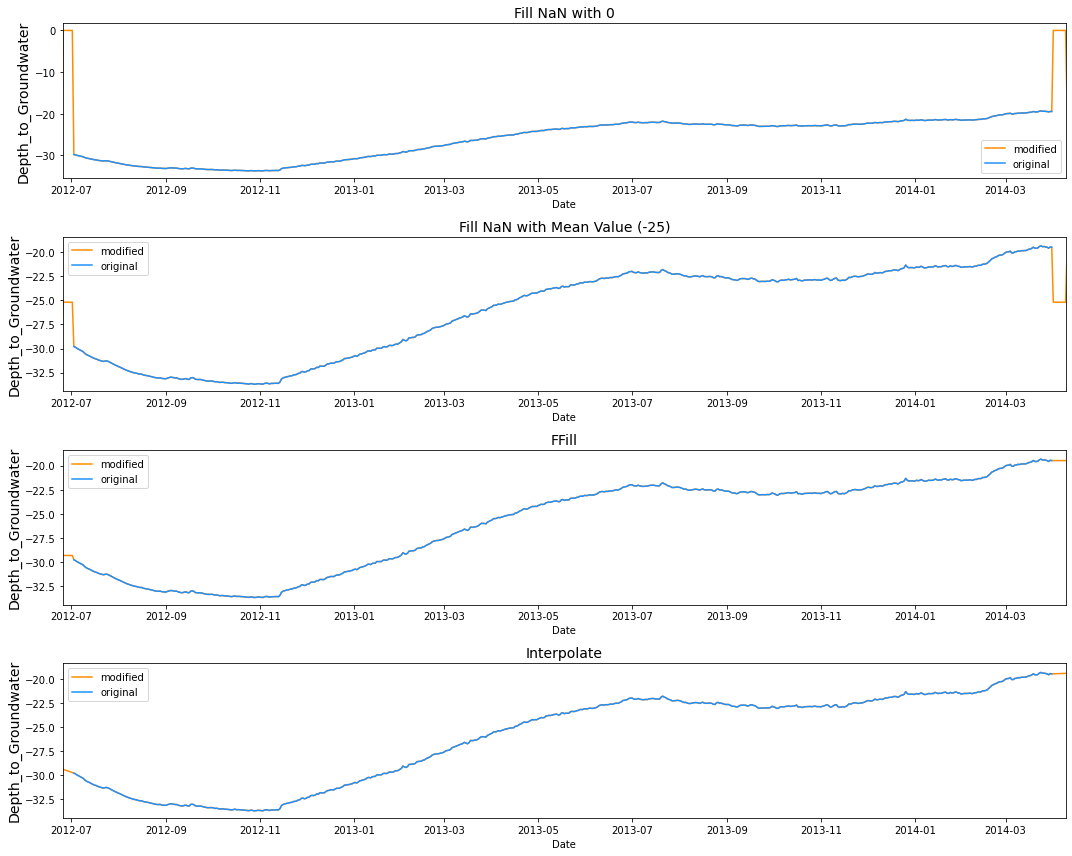

In [31]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))


sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Depth_to_Groundwater.fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Depth_to_Groundwater.fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)

mean_val = Aquifier_Petrignano_1.Depth_to_Groundwater.mean()
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Depth_to_Groundwater.fillna(mean_val), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Depth_to_Groundwater.fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_val:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)

sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Depth_to_Groundwater.ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Depth_to_Groundwater.fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)


sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Depth_to_Groundwater.interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=Aquifier_Petrignano_1.Date, y=Aquifier_Petrignano_1.Depth_to_Groundwater.fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)
plt.savefig('image/Figure9. Depth_to_Groundwater.png', format='png') # Save figure

for i in range(4):
    ax[i].set_xlim([date(2012, 6, 26), date(2014, 4, 9)])
plt.tight_layout()
plt.show()

### So, lets interplota missing values

In [32]:
Aquifier_Petrignano_1['Drainage_Volume'] = Aquifier_Petrignano_1['Drainage_Volume'].interpolate()
Aquifier_Petrignano_1['River_Hydrometry'] = Aquifier_Petrignano_1['River_Hydrometry'].interpolate()
Aquifier_Petrignano_1['Depth_to_Groundwater'] = Aquifier_Petrignano_1['Depth_to_Groundwater'].interpolate()
Aquifier_Petrignano_1['Temperature_Bastia_Umbra'] = Aquifier_Petrignano_1['Temperature_Bastia_Umbra'].interpolate()
Aquifier_Petrignano_1['Temperature_Petrignano'] = Aquifier_Petrignano_1['Temperature_Petrignano'].interpolate()

In [33]:
Aquifier_Petrignano_1['Depth_to_Groundwater'].isnull().sum()

0

There is no missing value in our target data Depth_to_Groundwater

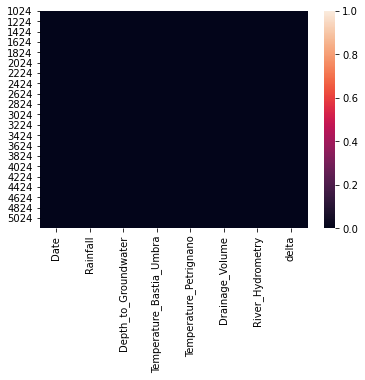

In [34]:
sns.heatmap(Aquifier_Petrignano_1.isnull())
plt.savefig('image/Figure10. Depth_to_Groundwater_P241.png', format='png') 

There is no missing value in dataset

### Resampling to Daily, Weekly, Monthly & Yearly

Resampling can provide additional information on the data. There are two types of resampling:

**Upsampling** is when the frequency of samples is increased (e.g. days to hours)

**Downsampling** is when the frequency of samples is decreased (e.g. days to weeks)

In this example, we will do some downsampling with the .resample() function (similar to groupby and aggregate as mean).

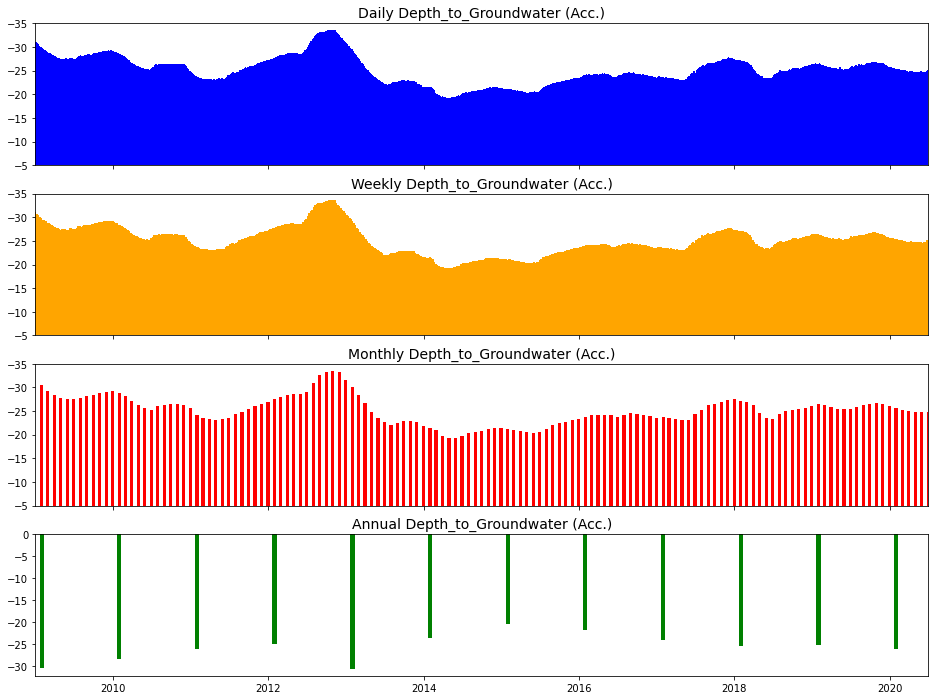

In [35]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,12))

ax[0].bar(Aquifier_Petrignano_1.Date, Aquifier_Petrignano_1.Depth_to_Groundwater, width=5, color='blue')
ax[0].set_title('Daily Depth_to_Groundwater (Acc.)', fontsize=14)

resampled_df = Aquifier_Petrignano_1[['Date','Depth_to_Groundwater']].resample('7D', on='Date').mean().reset_index(drop=False)
ax[1].bar(resampled_df.Date, resampled_df.Depth_to_Groundwater, width=10, color='orange')
ax[1].set_title('Weekly Depth_to_Groundwater (Acc.)', fontsize=14)

resampled_df = Aquifier_Petrignano_1[['Date','Depth_to_Groundwater']].resample('M', on='Date').mean().reset_index(drop=False)
ax[2].bar(resampled_df.Date, resampled_df.Depth_to_Groundwater, width=15, color='red')
ax[2].set_title('Monthly Depth_to_Groundwater (Acc.)', fontsize=14)

resampled_df = Aquifier_Petrignano_1[['Date','Depth_to_Groundwater']].resample('12M', on='Date').mean().reset_index(drop=False)
ax[3].bar(resampled_df.Date, resampled_df.Depth_to_Groundwater, width=20, color='green')
ax[3].set_title('Annual Depth_to_Groundwater (Acc.)', fontsize=14)
plt.savefig('image/Figure11. Depth_to_Groundwater.png', format='png') # Save figure

for i in range(3):
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i].set_ylim([-5, -35])
plt.show()

After review the data get to know underground water depth is more in year 2009 of around(-31) after that it's level got decrease. It goes up again in year 2013 around(-31). According to our data 2013 has less level of underground water after that it's started to increase. Underground water level depends on varios factors like rainfall. After review the monthly data in the month of august, september, october water level is more every year.

In [36]:
old_df = Aquifier_Petrignano_1.copy()

In [37]:
df = old_df[['Date','Depth_to_Groundwater']]
df.head(2)

,Date,Depth_to_Groundwater
1024,2009-01-01,-31.14
1025,2009-01-02,-31.11


## Stationarity

Stationarity is requirement of most of the time series Model

Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

1. constant mean and mean is not time-dependent
2. constant variance and variance is not time-dependent
3. constant covariance and covariance is not time-dependent

If a time series has a stationary behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.

Time series with trend and/or seasonality are not stationary. Trend indicates that the mean is not constant over time and seasonality indicates that the variance is not constant over time.

#### check for stationarity

The check for stationarity can be done via three different approaches:

1. visually: plot time series and check for trends or seasonality
2. basic statistics: split time series and compare the mean and variance of each partition
3. statistical test: Augmented Dickey Fuller test

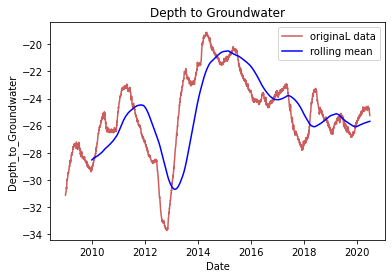

In [38]:
rolling_window = 365
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater, color='indianred',label = 'originaL data')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater.rolling(rolling_window).mean(),color = 'blue',label='rolling mean')
plt.title('Depth to Groundwater')
plt.savefig('image/Figure12. Depth_to_Groundwater.png', format='png') # Save figure


### Rolling Mean and Standard deviation

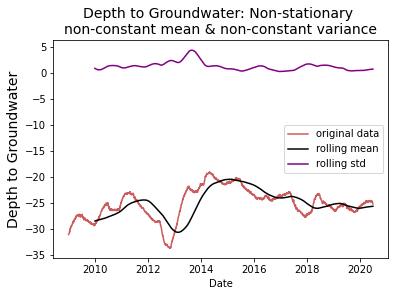

In [39]:
rolling_window = 365
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater, color='indianred',label = 'original data')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater.rolling(rolling_window).mean(), color='black', label='rolling mean')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater.rolling(rolling_window).std(), color='purple', label='rolling std')
plt.title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
plt.ylabel(ylabel='Depth to Groundwater', fontsize=14)
plt.savefig('image/Figure13. Depth_to_Groundwater_rolling_mean.png', format='png') # Save fig


We have original data in red line. Rolling Mean is in black and std is in purple line. 

In this visual check, we can see that the **features don't have constant mean and std**

Next, we will check the underlying statistics. For this we will split the time series into two sections and check the mean and the variance. We can do more partitions.


### Testing for stationarity with KPSS

As we know, when doing time series analysis we always have to check for stationarity. Imprecisely, a time series dataset is stationary just if its statistical features don't change over time. A little more precisely, a stationary time series dataset will have **constant mean, variance, and covariance.**

There are many ways to test for stationarity, but one of the most common is the **KPSS test.** The Null hypothesis of this test is that the time series data in question is stationary; hence, **if the p-value is less than the significance level (typically 0.05, but we decide) then we reject the Null and infer that the data is stationary.**

In [40]:
y = df['Depth_to_Groundwater']
from statsmodels.tsa.stattools import kpss
kpss(y)

E:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(2.1687790313278463,
 0.01,
 31,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Since our p-value is less than 0.05, we should reject the Null hypothesis and deduce the non-stationarity of our data.

But our data need to be stationary! So we need to do some transforming.

## Unit Root Test

**Unit Root Test
Unit root is a characteristic of a time series that makes it non-stationary.** And ADF test belong to the unit root test. Technically , a unit root is said to exist in a time series of value of alpha =1 in below equation.

Y
t
=
α
Y
t
−
1
+
β
X
e
+
ϵ
 
where Yt is value of the time series at time ‘t’ and Xe is an exogenous variable .

**The presence of a unit root means the time series is non-stationary.**

### Augmented Dickey-Fuller (ADF)

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

**Null Hypothesis (H0):**Time series has a unit root. (Time series is not stationary).

**Alternate Hypothesis (H1):** Time series has no unit root (Time series is stationary).

**If the null hypothesis can be rejected, we can conclude that the time series is stationary.**

There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

**p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

**ADF statistic > critical value**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
**ADF statistic < critical value**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [41]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Depth_to_Groundwater'].values)
result

(-2.8998369955680463,
 0.045366955953433534,
 28,
 4170,
 {'1%': -3.4319191438819407,
  '5%': -2.8622333615468443,
  '10%': -2.567139082403142},
 -11587.395288114172)

Now, we are going to check for each variable:

The p-value is less than 0.05

Check the range of the ADF statistic compared with critical_values

0th element is teststatistic(-2.89) More negative means more likely to be stationary
Here ADF statistic < critical then we say data is stationary but in this case ADF statistic > -3.43(1%) critical value so we say data is non stationary 

1st element is p-value:(0.04) If p-value is small reject null hypothesis.

4th element is the critical test statistics




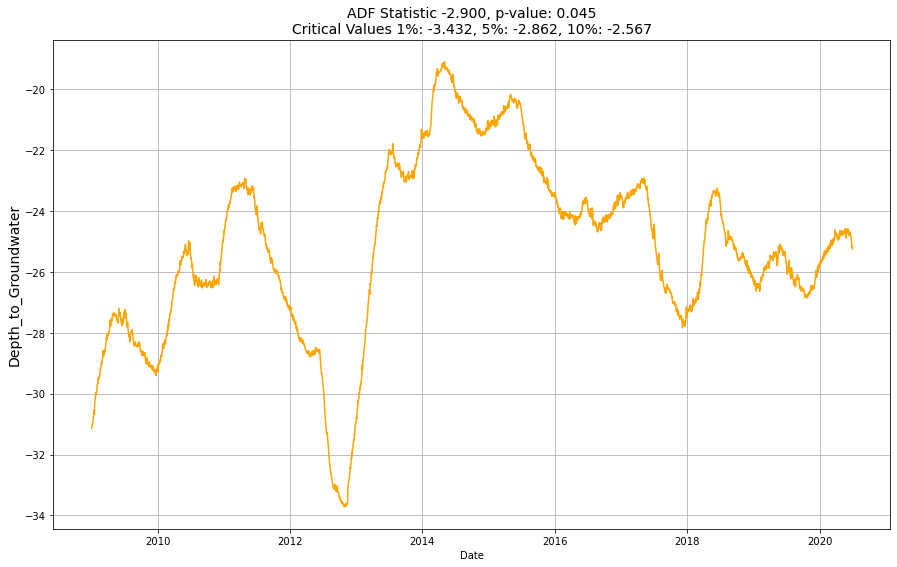

In [42]:
def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
        
    sns.lineplot(x=df['Date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))
visualize_adfuller_results(df['Depth_to_Groundwater'].values, 'Depth_to_Groundwater', ax)

plt.savefig('image/Figure14. Depth_to_Groundwater_rolling_mean.png', format='png') # Save figure

plt.grid()
#plt.tight_layout()
plt.show()

If the data is not stationary but we want to use a model that requires with characteristic, the data has to be transformed. However, if the data is not stationary to begin with, we should rethink the choice of model.

The two most common methods to achieve stationarity are:

1. Transformation: e.g. log or square root to stabilize non-constant variance
2. Differencing: subtracts the current value from the previous

###  Log Transforming

In [43]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['Depth_to_Groundwater_log'] = np.log(abs(df.Depth_to_Groundwater))

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with sim

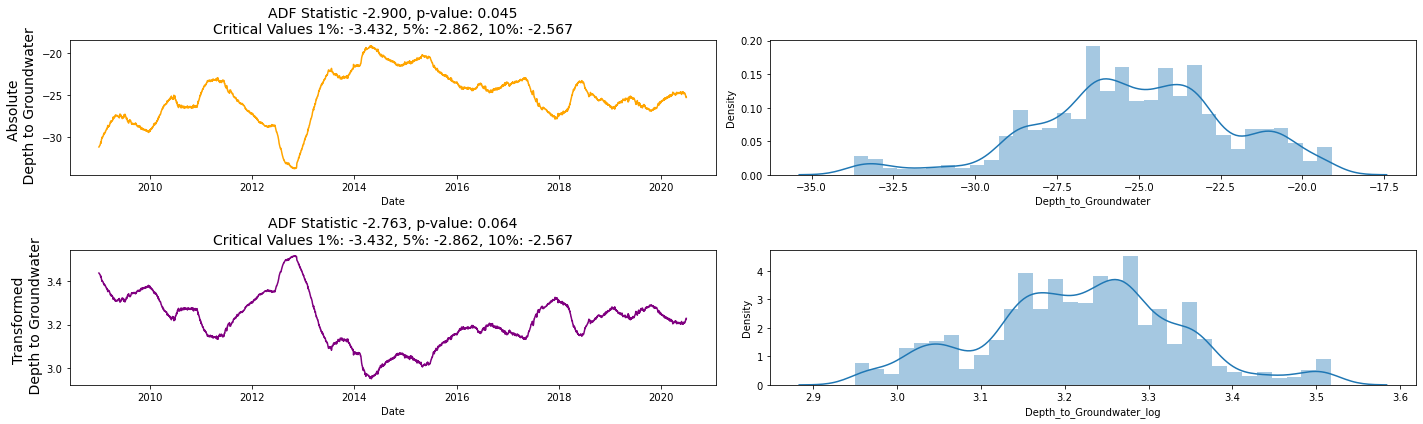

In [44]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['Depth_to_Groundwater_log'] = np.log(abs(df['Depth_to_Groundwater']))

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))

visualize_adfuller_results(df['Depth_to_Groundwater'], 'Absolute \n Depth to Groundwater', ax[0,0])
sns.distplot(df['Depth_to_Groundwater'], ax=ax[0,1])

visualize_adfuller_results(df['Depth_to_Groundwater_log'], 'Transformed \n Depth to Groundwater', ax[1,0])
sns.distplot(df['Depth_to_Groundwater_log'], ax=ax[1,1])


#f.delaxes(ax)
plt.tight_layout()
plt.savefig('image/Figure15. Depth_to_Groundwater_rolling_mean.png', format='png') # Save fig


## Differencing

Differencing can be done in different orders:

1. First order differencing: linear trends with  zi=yi−yi−1 
2. Second-order differencing: quadratic trends with  zi=(yi−yi−1)−(yi−1−yi−2) 

and so on...

In [45]:
# First Order Differencing
ts_diff = np.diff(df.Depth_to_Groundwater)
df['Depth_to_Groundwater_diff_1'] = np.append([0], ts_diff)
# df['Depth_to_Groundwater_diff_1'] =  np.diff(df.Depth_to_Groundwater)

# Second Order Differencing
ts_diff = np.diff(df.Depth_to_Groundwater_diff_1)
df['Depth_to_Groundwater_diff_2'] = np.append([0], ts_diff)


E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


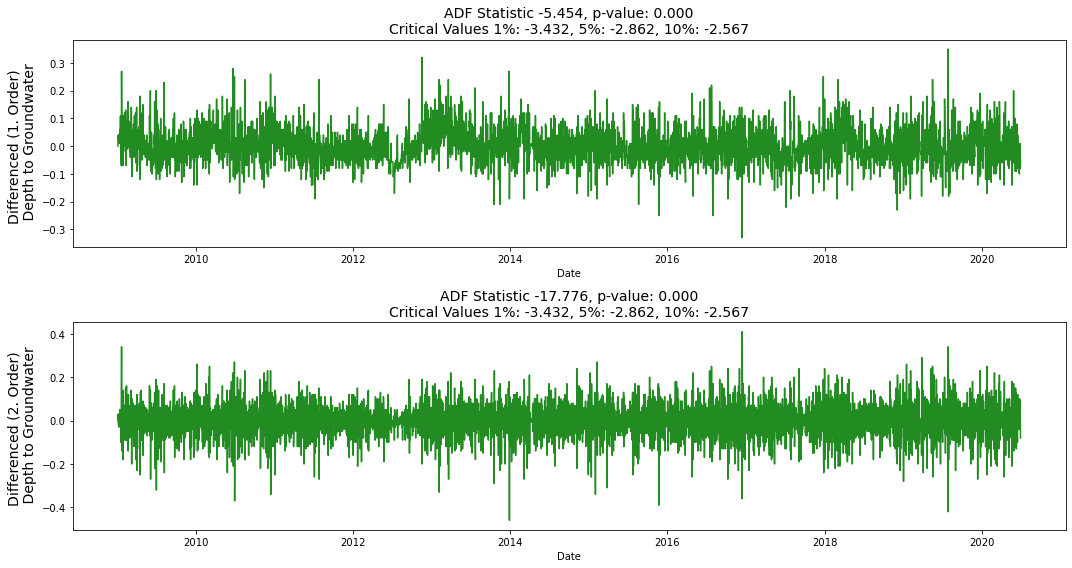

In [46]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

visualize_adfuller_results(df.Depth_to_Groundwater_diff_1, 'Differenced (1. Order) \n Depth to Groundwater', ax[0])

visualize_adfuller_results(df.Depth_to_Groundwater_diff_2, 'Differenced (2. Order) \n Depth to Groundwater', ax[1])

plt.tight_layout()
plt.savefig('image/Figure16. Depth_to_Groundwater_rolling_mean.png', format='png') # Save figure

plt.show()


After visualizing the first and second order differencing we see ADF statistics is more negative it means second order in more acurate than first order differencing.P-value is 0 after differincing so we can say our data is stationary now.

The differencing can be reverted if the the first value before differencing is known. In this case, we can accumulate all values with the function .cumsum() and add the first value of the original time series.

In [47]:
df.Depth_to_Groundwater.equals(df.Depth_to_Groundwater_diff_1.cumsum() + df.Depth_to_Groundwater.iloc[0])

True

## Decomposition

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

Level: The average value in the series.

Trend: The increasing or decreasing value in the series.

Seasonality: The repeating short-term cycle in the series.

Noise: The random variation in the series.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively:


We can use the function seasonal_decompose() from the statsmodels library.

Additive:  y(t)=Level+Trend+Seasonality+Noise 

Multiplicative:  y(t)=Level∗Trend∗Seasonality∗Noise

In [48]:
df.head()

,Date,Depth_to_Groundwater,Depth_to_Groundwater_log,Depth_to_Groundwater_diff_1,Depth_to_Groundwater_diff_2
1024,2009-01-01,-31.14,3.438493,0.00,0.00
1025,2009-01-02,-31.11,3.437529,0.03,0.03
1026,2009-01-03,-31.07,3.436243,0.04,0.01
1027,2009-01-04,-31.05,3.435599,0.02,-0.02
1028,2009-01-05,-31.01,3.434310,0.04,0.02


we see the log and 2 order differencing value

E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


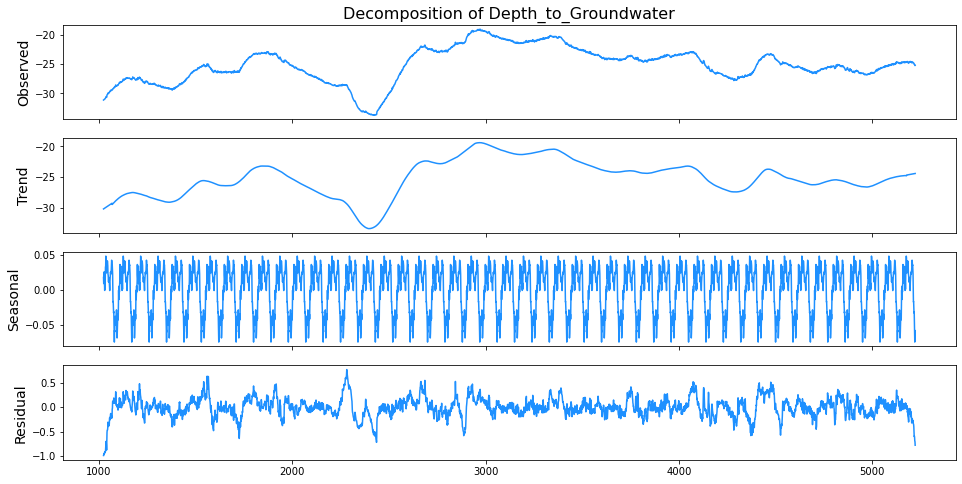

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,8))

res = seasonal_decompose(df['Depth_to_Groundwater'], freq=90, model='additive', extrapolate_trend='freq')#quartly frequency

ax[0].set_title('Decomposition of {}'.format('Depth_to_Groundwater'), fontsize=16)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)
    
res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=14)
    
plt.savefig('image/Figure17. Depth_to_Groundwater_P241.png', format='png') #Save figure
plt.show()


After reviewing the trend we find there is no such trend sometime waterlevel goes up and sometime it's goes down

## Seasonal Shift

In [50]:
col = "Depth_to_Groundwater"
df[f"{col}_trend"] = res.trend
df[f"{col}_seasonal"] = res.seasonal

df[['Depth_to_Groundwater', 'Depth_to_Groundwater_trend', 'Depth_to_Groundwater_seasonal']].head()\
.style.set_properties(subset=['Depth_to_Groundwater_trend', 'Depth_to_Groundwater_seasonal'
                             ], **{'background-color': 'pink'})

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Depth_to_Groundwater,Depth_to_Groundwater_trend,Depth_to_Groundwater_seasonal
1024,-31.140000,-30.167582,0.017557
1025,-31.110000,-30.146579,0.008766
1026,-31.070000,-30.125576,0.011915
1027,-31.050000,-30.104572,0.025520
1028,-31.010000,-30.083569,0.016158


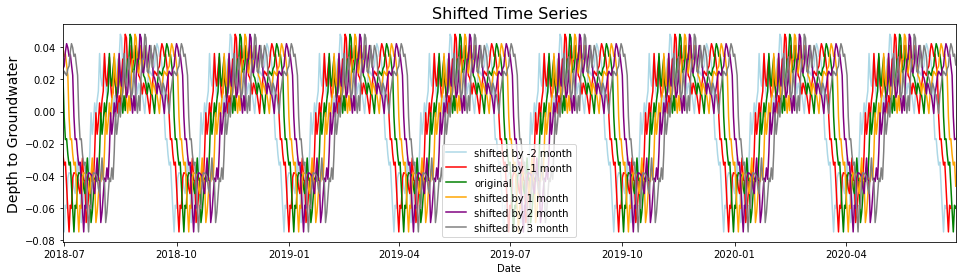

In [51]:
weeks_in_month = 4

df['Depth_to_Groundwater_seasonal_shift_r_2M'] = df.Depth_to_Groundwater_seasonal.shift(-2*weeks_in_month)
df['Depth_to_Groundwater_seasonal_shift_r_1M'] = df.Depth_to_Groundwater_seasonal.shift(-1*weeks_in_month)
df['Depth_to_Groundwater_seasonal_shift_1M'] = df.Depth_to_Groundwater_seasonal.shift(1*weeks_in_month)
df['Depth_to_Groundwater_seasonal_shift_2M'] = df.Depth_to_Groundwater_seasonal.shift(2*weeks_in_month)
df['Depth_to_Groundwater_seasonal_shift_3M'] = df.Depth_to_Groundwater_seasonal.shift(3*weeks_in_month)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_seasonal_shift_r_2M, label='shifted by -2 month', ax=ax, color='lightblue')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_seasonal_shift_r_1M, label='shifted by -1 month', ax=ax, color='red')

sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_seasonal, label='original', ax=ax, color='green')

sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_seasonal_shift_1M, label='shifted by 1 month', ax=ax, color='orange')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_seasonal_shift_2M, label='shifted by 2 month', ax=ax, color='purple')
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_seasonal_shift_3M, label='shifted by 3 month', ax=ax, color='gray')

ax.set_title('Shifted Time Series', fontsize=16)

ax.set_xlim([date(2018, 6, 30), date(2020, 6, 30)])
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)
plt.savefig('image/Figure18. Depth_to_Groundwater_P241.png', format='png') 

plt.show()

## Seasonal Component

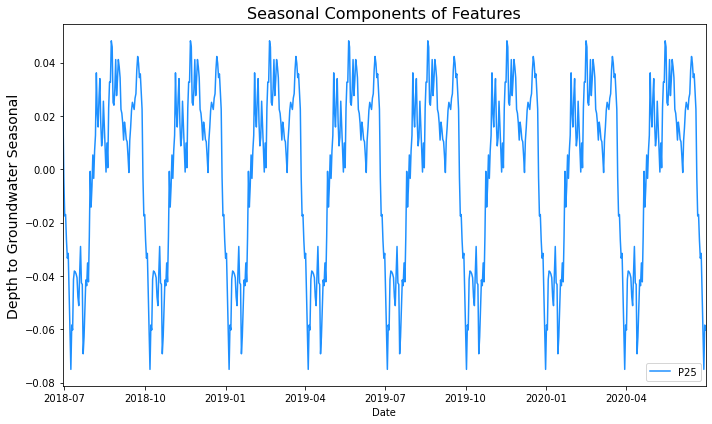

In [52]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.set_title('Seasonal Components of Features', fontsize=16)
sns.lineplot(x=df.Date, y=df.Depth_to_Groundwater_seasonal, color='dodgerblue', label='P25')
ax.set_ylabel(ylabel='Depth to Groundwater Seasonal', fontsize=14)

ax.set_xlim([date(2018, 6, 30), date(2020, 6, 30)])
plt.tight_layout()
plt.savefig('image/Figure19. Depth_to_Groundwater_P241.png', format='png') 

plt.show()

As we see water level goes up in every 3 month.Water label is down in month of mid August,september and October

## Autocorrelation Analysis

This EDA step is especially important when using ARIMA. The autocorrelation analysis helps to identify the AR and MA parameters for the ARIMA model.

Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

**Autocorrelation Function (ACF):** Correlation between time series with a lagged version of itself. The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1. -> MA parameter is q significant lags

**Partial Autocorrelation Function (PACF):**Additional correlation explained by each successive lagged term -> AR parameter is p significant lags

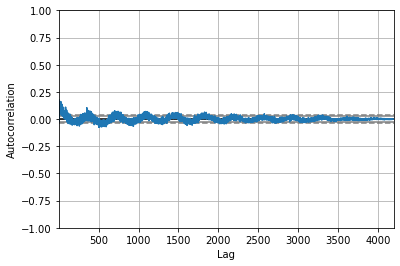

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Depth_to_Groundwater_diff_1) 
#autocorrelation_plot(df.Depth_to_Groundwater) # blue

plt.savefig('image/Figure20. Depth_to_Groundwater_P241.png', format='png') 
plt.show()

As we can infer from the graph above, the autocorrelation continues to decrease as the lag increases, confirming that there is no linear association between observations separated by larger lags.

### ACF and PACF

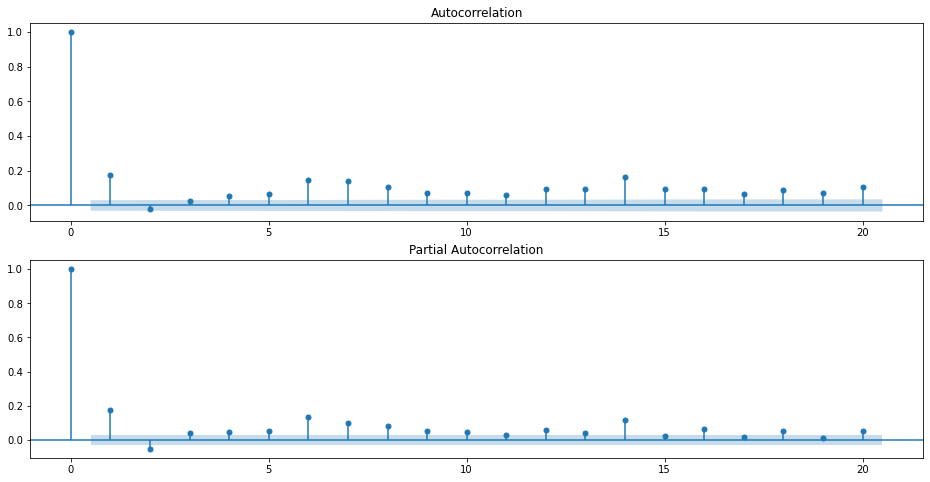

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df.Depth_to_Groundwater_diff_1,lags=20, ax=ax[0])
plot_pacf(df.Depth_to_Groundwater_diff_1,lags=20, ax=ax[1])
plt.savefig('image/Figure22. Depth_to_Groundwater_P241.png', format='png') #Save figure 

plt.show()

## Cross Validation

In [55]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3
df = df.reset_index(drop=True)
X = df.Date
y = df.Depth_to_Groundwater

folds = TimeSeriesSplit(n_splits = N_SPLITS)

In [56]:
df.tail()

,Date,Depth_to_Groundwater,Depth_to_Groundwater_log,Depth_to_Groundwater_diff_1,Depth_to_Groundwater_diff_2,Depth_to_Groundwater_trend,Depth_to_Groundwater_seasonal,Depth_to_Groundwater_seasonal_shift_r_2M,Depth_to_Groundwater_seasonal_shift_r_1M,Depth_to_Groundwater_seasonal_shift_1M,Depth_to_Groundwater_seasonal_shift_2M,Depth_to_Groundwater_seasonal_shift_3M
4194,2020-06-26,-25.07,3.221672,0.00,0.10,-24.432478,-0.046558,NaN,-0.060289,-0.016991,0.029036,0.042301
4195,2020-06-27,-25.11,3.223266,-0.04,-0.04,-24.426711,-0.061462,NaN,NaN,-0.026670,0.022526,0.039733
4196,2020-06-28,-25.19,3.226447,-0.08,-0.04,-24.420944,-0.075073,NaN,NaN,-0.033364,-0.003137,0.034386
4197,2020-06-29,-25.18,3.226050,0.01,0.09,-24.415177,-0.058439,NaN,NaN,-0.031558,-0.017518,0.035776
4198,2020-06-30,-25.25,3.228826,-0.07,-0.08,-24.409410,-0.060289,NaN,NaN,-0.046558,-0.016991,0.029036


0
[   0    1    2 ... 1049 1050 1051]
[1052 1053 1054 ... 2098 2099 2100]
1
[   0    1    2 ... 2098 2099 2100]
[2101 2102 2103 ... 3147 3148 3149]
2
[   0    1    2 ... 3147 3148 3149]
[3150 3151 3152 ... 4196 4197 4198]


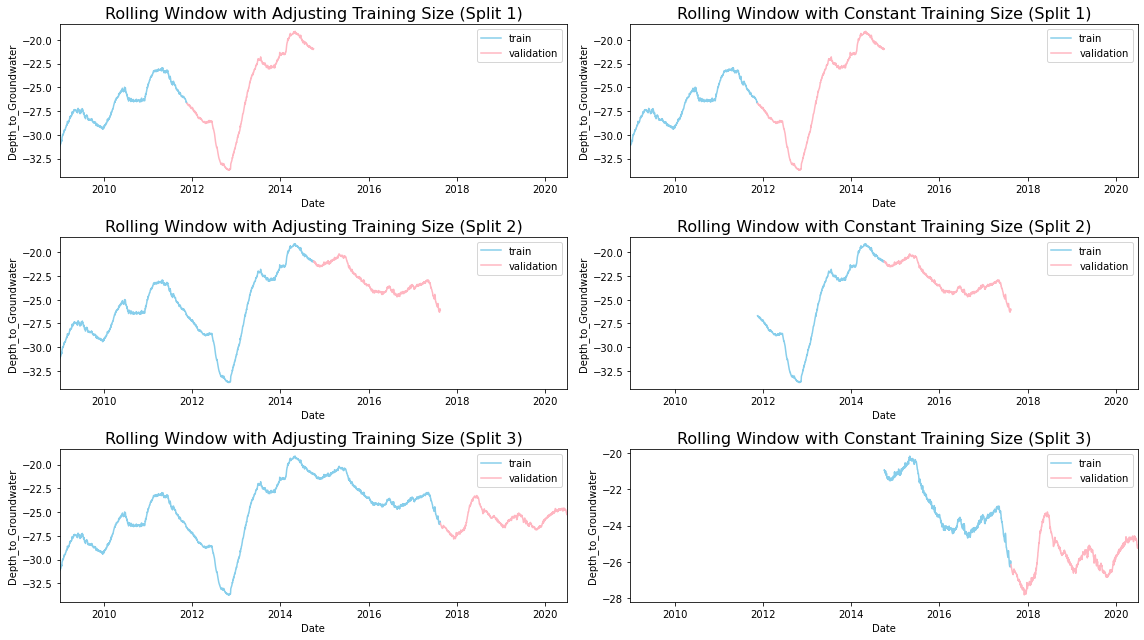

In [57]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, test_index) in enumerate(folds.split(X)):
    print(i)
    print(train_index)
    print(test_index)
    

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='skyblue', label='train')
    sns.lineplot(x= X_train[len(X_train) - len(X_test):(len(X_train) - len(X_test) + len(X_test))], 
                 y= y_train[len(X_train) - len(X_test):(len(X_train) - len(X_test) + len(X_test))], 
                 ax=ax[i,1], color='skyblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_test, y= y_test, ax=ax[i, j], color='lightpink', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.tight_layout()
plt.savefig('image/Figure23. Depth_to_Groundwater_P241.png', format='png') #Save Figure
plt.show()

## Models for Univariate Time Series

First of all, we are going to analize univariate TimeSeries forecasting.

Univariate time series: Only one variable is varying over time. For example, data collected from a sensor measuring the temperature of a room every second. Therefore, each second, you will only have a one-dimensional value, which is the temperature.

## ARIMA

The Auto-Regressive Integrated Moving Average (ARIMA) model describes the autocorrelations in the data. The model assumes that the time-series is stationary. It consists of three main parts:

Auto-Regressive (AR) filter (long term):

y
t
=
c
+
α
1
y
t
−
1
+
…
α
p
y
t
−
p
+
ϵ
t
=
c
+
∑
p
i
=
1
α
i
y
t
−
i
+
ϵ
t
  -> p

Integration filter (stochastic trend)

-> d

Moving Average (MA) filter (short term):

y
t
=
c
+
ϵ
t
+
β
1
ϵ
t
−
1
+
⋯
+
β
q
ϵ
t
−
q
=
c
+
ϵ
t
+
∑
q
i
=
1
β
i
ϵ
t
−
i
  -> q

ARIMA:  
y
t
=
c
+
α
1
y
t
−
1
+
⋯
+
α
p
y
t
−
p
+
ϵ
t
+
β
1
ϵ
t
−
1
+
⋯
+
β
q
ϵ
t
−
q
 
ARIMA( p, d, q)

p: Lag order (reference PACF in Autocorrelation Analysis)
d: Degree of differencing. (reference Differencing in Stationarity)
q: Order of moving average (check out ACF in Autocorrelation Analysis)

#### Train_Test Split

In [58]:
train_size = 3834 
test_size = len(df) - 3834 #last 365 day data
print("Train Size :", train_size)
print("Test Size : ", test_size)

univariate_df = df[['Date', 'Depth_to_Groundwater']].copy()

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_test, y_test = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])


Train Size : 3834
Test Size :  365


In [59]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Fit model
model = ARIMA(y_train, order=(1,1,1)) # Model is trained using trained data
results = model.fit() #Result

# Prediction with ARIMA
y_pred, se, conf = results.forecast(365) #unpacking returns Prediction, Standard Error, Confidence Interval
print(len(y_pred))
print(len(y_test))

# Calcuate metrics
score_mae = mean_absolute_error(y_test, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
score_r2 = r2_score(y_test, y_pred)


print('MAE: {}'.format(score_mae))
print('RMSE: {}'.format(score_rmse))
print('R_square: {}'.format(score_r2))

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


365
365
MAE: 0.5571766782156528
RMSE: 0.6505699165470451
R_square: 0.21822127940770408


E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [60]:
print(results.summary())


                               ARIMA Model Results                                
Dep. Variable:     D.Depth_to_Groundwater   No. Observations:                 3833
Model:                     ARIMA(1, 1, 1)   Log Likelihood                5206.044
Method:                           css-mle   S.D. of innovations              0.062
Date:                    Sat, 10 Apr 2021   AIC                         -10404.088
Time:                            10:50:28   BIC                         -10379.083
Sample:                                 1   HQIC                        -10395.205
                                                                                  
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0014      0.001      1.183      0.237      -0.001       0.004
ar.L1.D.Depth_to_Groundwater    -0.0652      

Lower BIC indicates a better model

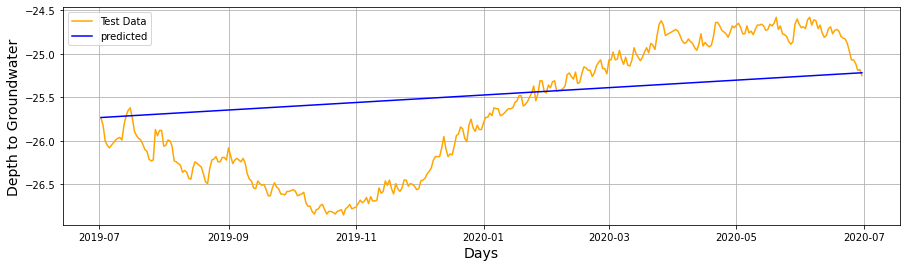

In [61]:
#Test vs Prediction using y_pred & y_test
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_test.Date, y=y_test['Depth_to_Groundwater'], ax=ax, color='orange', label='Test Data') 
sns.lineplot(x=x_test.Date, y=y_pred, ax=ax, color='blue', label='predicted') 
ax.set_xlabel(xlabel='Days', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)
plt.grid()
plt.savefig('image/Figure24. Depth_to_Groundwater_P241.png', format='png') 
plt.show()

for example on day 3900 underground water label is -26.3 but predicted label is -25.6.predicted water label is from -25.6 to -25.2

### Residual

#### Residual of Predicted vs Train

Residual for predicted vs Train data


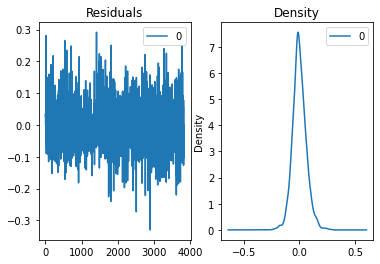

In [62]:
# Plot residual errors
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
print("Residual for predicted vs Train data")
plt.savefig('image/Figure25. Depth_to_Groundwater_P241.png', format='png') 
plt.show()

With test data residual is concentrated at 0 and density is from -0.5 to 0.5

#### Residual of Predicted vs Test Data

Residual for predicted vs Test data


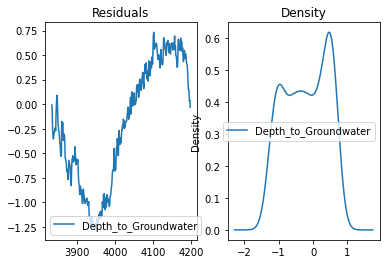

In [63]:
residual = y_test['Depth_to_Groundwater']  - y_pred
residual = pd.DataFrame(residual)
#print(residual)

fig, ax = plt.subplots(1,2)
residual.plot(title="Residuals", ax=ax[0])
residual.plot(kind='kde', title='Density', ax=ax[1])
# plot residuals
#residual.plot()
print("Residual for predicted vs Test data")
plt.savefig('image/Figure26. Depth_to_Groundwater_P241.png', format='png') 

plt.show()


residual with 365 test data and predicted data, value varies from -1.25 to .75. And density is from 1 to -2

### ARIMA Prediction

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

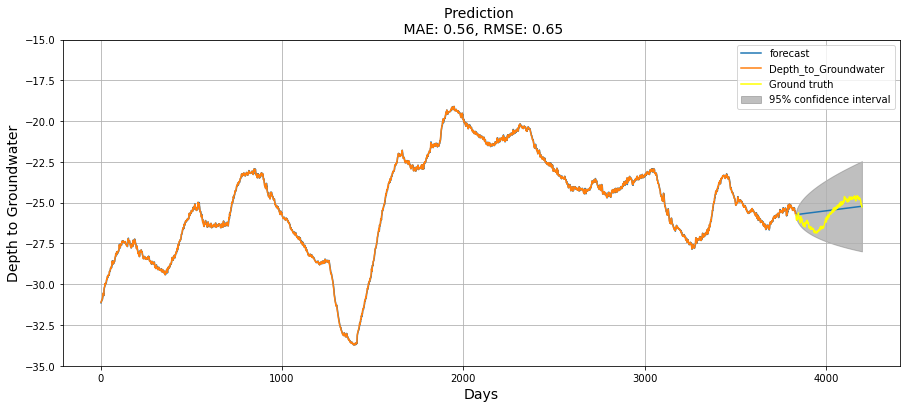

In [64]:
# Fit model
#model = ARIMA(df['Depth_to_Groundwater'], order=(1,1,1)) #Model is trained using all available data, to make accurate prediction
model = ARIMA(y_train, order=(1,1,1))#Model is trained using training data, to make accurate predic
results = model.fit() #Result


# Prediction with ARIMA
y_pred, se, conf = results.forecast(365) #returns Prediction, Standard Error, Confidence Interval

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)
results.plot_predict(1,4198, ax=ax, alpha=0.05)
#results.plot_predict(1,4565, ax=ax, alpha=0.05)

sns.lineplot(x = x_test.index, y = y_test['Depth_to_Groundwater'], ax=ax, color='yellow', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Days', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

ax.set_ylim(-35, -15)
plt.savefig('image/Figure27. Depth_to_Groundwater_P241.png', format='png') 
plt.grid()
plt.show()


### Forecasting one step ahead prediction (365 days)

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

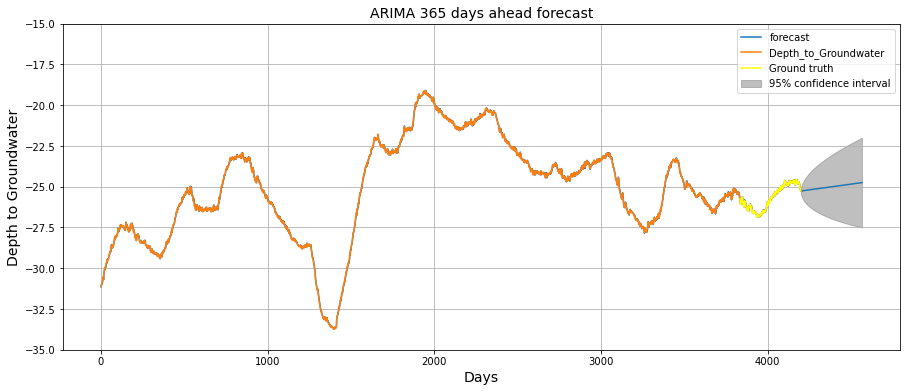

In [65]:
# Fit model
#model = ARIMA(df['Depth_to_Groundwater'], order=(1,1,1)) #Model is trained using all available data, to make accurate prediction
#results = model.fit() #Result

model = ARIMA(df['Depth_to_Groundwater'], order=(1,1,1))
results = model.fit() #Result

# Prediction with ARIMA
y_pred, se, conf = results.forecast(365) #returns Prediction, Standard Error, Confidence Interval

f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

results.plot_predict(1,4565, ax=ax, alpha=0.05)

sns.lineplot(x = x_test.index, y = y_test['Depth_to_Groundwater'], ax=ax, color='yellow', label='Ground truth')

ax.set_title("ARIMA 365 days ahead forecast", fontsize=14)
ax.set_xlabel(xlabel='Days', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

ax.set_ylim(-35, -15)
plt.savefig('image/Figure28. Depth_to_Groundwater_P241.png', format='png') 
plt.grid()
plt.show()

forecast 365 days ahead data and get to know forecast water label is -26 to -26.2 and didn't goes out of confidence interval.So we have water label till 2021/06/30

## Auto ARIMA

In [66]:
import pmdarima as pm
from pmdarima import auto_arima


model = pm.auto_arima(y_train, start_p=2, start_q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-10490.096, Time=6.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10257.991, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10396.477, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10405.397, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10258.095, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-10401.846, Time=3.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-10402.155, Time=6.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-10476.427, Time=10.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-10498.303, Time=11.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-10607.872, Time=9.60 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-10402.696, Time=3.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-10404.023, Time=2.51 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-10639.104, Time=4.60 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-10403.327, Time=1.47 sec
 AR

AutoARIMA (auto_arima) validates that (1,1,3) is the best configuration for (p,d,q). With highest AIC=-10639.104.

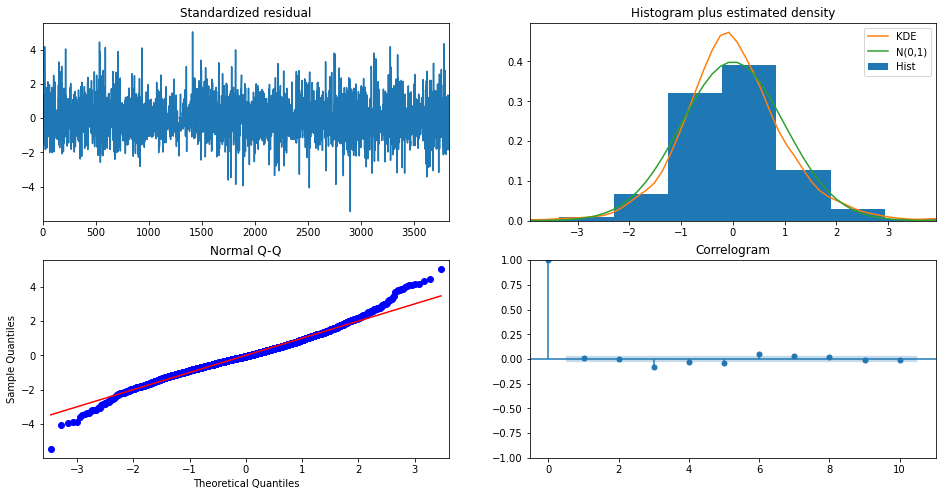

In [67]:
model.plot_diagnostics(figsize=(16,8))
plt.savefig('image/Figure36. Depth_to_Groundwater_P241.png', format='png') 
plt.show()

So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance between (-4, 4).

Top Right: The density plot suggest abnormal distribution with mean zero. Squed more towards negative

Bottom left: The most part of the blue dots are over the red line, so it seems that the distribution in very low skewed (not skewed for me).

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated.

## Facebook Prophet

Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date 
The y column must be numeric, and represents the measurement we wish to forecast.

The first model (which also can handle multivariate problems) we are going to try is Facebook Prophet.

Prophet, or “Facebook Prophet,” is an open-source library for univariate (one variable) time series forecasting developed by Facebook.


In [68]:
univariate_df = df[['Date', 'Depth_to_Groundwater']].copy()
univariate_df.columns = ['ds', 'y'] # As per Convention in Prophet Model

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_test, y_test = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(x_train), len(x_test))
print(y_train.head())
print(y_test.head())


3834 365
       y
0 -31.14
1 -31.11
2 -31.07
3 -31.05
4 -31.01
          y
3834 -25.74
3835 -25.82
3836 -26.00
3837 -26.05
3838 -26.08


We fit the model by instantiating a new Prophet object.Then call its fit method and pass in the dataframe. 

In [69]:
train_df = univariate_df.iloc[:train_size]
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math
from fbprophet import Prophet

# Train the model
model = Prophet() #
model.fit(train_df) #training model on train data

# Predict on test set
y_pred = model.predict(x_test)

# Calcuate metrics
score_mae = mean_absolute_error(y_test, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_test, y_pred.tail(test_size)['yhat']))
score_r2 = r2_score(y_test, y_pred.tail(test_size)['yhat'])

print('MAE: {}'.format(score_mae))
print('RMSE: {}'.format(score_rmse))
print('R_square: {}'.format(score_r2))


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE: 0.5433862301370609
RMSE: 0.627426141472723
R_square: 0.2728548525889216


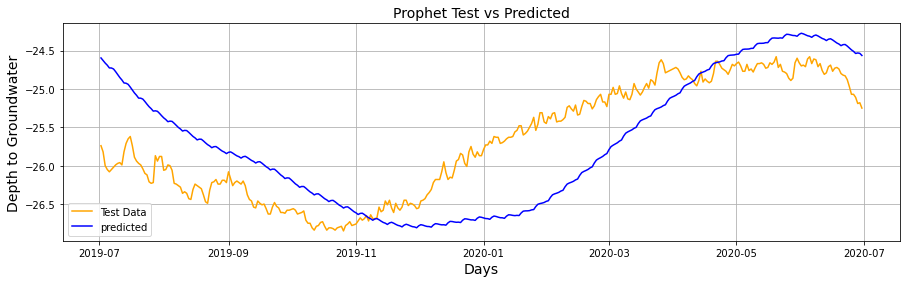

In [70]:
#Test vs Prediction using ypred & y_test
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_test.ds, y=y_test['y'], ax=ax, color='orange', label='Test Data') 
sns.lineplot(x=y_pred.ds, y=y_pred['yhat'], ax=ax, color='blue', label='predicted') 

ax.set_title("Prophet Test vs Predicted", fontsize=14)
ax.set_xlabel(xlabel='Days', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)
plt.grid()
plt.savefig('image/Figure30. Depth_to_Groundwater_P241.png', format='png') 
plt.show()

In [71]:
df = pd.DataFrame()
#y_test.tail()
df['test'] = y_test['y'].copy()
df.reset_index(inplace=True)
df['pred'] = y_pred['yhat']


Prophet : Residual for predicted vs Test data


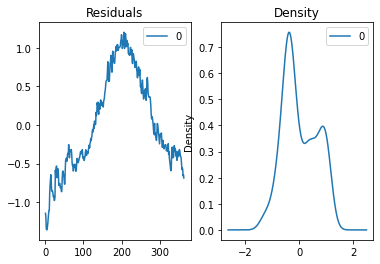

In [72]:
residual = df['test']  - df['pred']
residual = pd.DataFrame(residual)
#print(residual)
fig, ax = plt.subplots(1,2)
residual.plot(title="Residuals", ax=ax[0])
residual.plot(kind='kde', title='Density', ax=ax[1])
# plot residuals
#residual.plot()
print("Prophet : Residual for predicted vs Test data")
plt.savefig('image/Figure31. Depth_to_Groundwater_P241.png', format='png') 

plt.show()

yhat_lower & yhat_upper is lower and upper value WRT yhat. yhat column is the predicted value

In [73]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

### Plot the Prediction

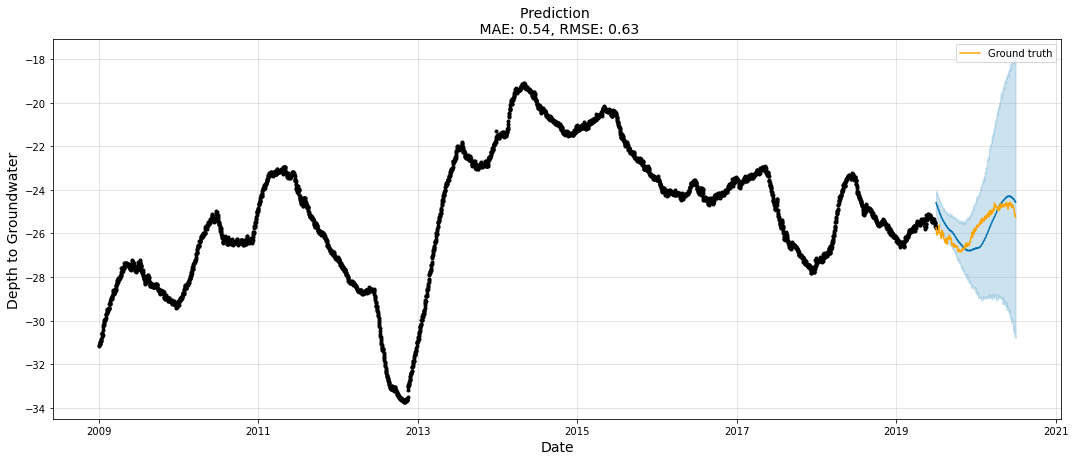

In [74]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_test['ds'], y=y_test['y'], ax=ax, color='orange', label='Ground truth') 

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)
plt.savefig('image/Figure32. Depth_to_Groundwater_P241.png', format='png') 

plt.show()

blue line show prediction and yellow line shows test data.light blue shaded area shows the confidence interval. 

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math
from fbprophet import Prophet

# Train the model
model = Prophet()
model.fit(univariate_df) # whole DataFrame

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecast

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. we can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [76]:
future_dates = model.make_future_dataframe(periods=365)

The predict method will assign each row in future a predicted value which it names yhat. If we pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [77]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4559,2021-06-26,-25.019972,-30.370841,-19.189230
4560,2021-06-27,-25.016256,-30.280634,-19.383789
4561,2021-06-28,-25.025584,-30.290091,-19.295030
4562,2021-06-29,-25.057297,-30.387384,-19.081710
4563,2021-06-30,-25.090392,-30.557289,-19.122882


yhat is predicted value

In Dataframe we see last 365 days predicted value. i can plot the forecast by calling the Prophet.plot method and passing in forecast dataframe.

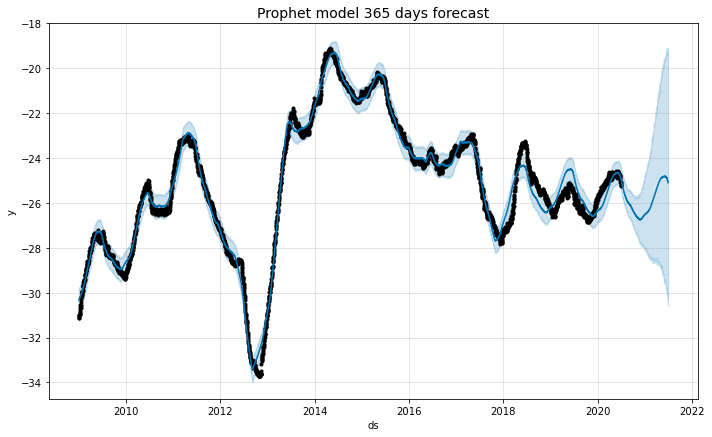

In [78]:
model.plot(forecast)
plt.title('Prophet model 365 days forecast', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)
plt.savefig('image/Figure33. Depth_to_Groundwater_P241.png', format='png') 

plt.show()

Dotted line in real data solid blue line is projection. Light blue is basically trend space.After review the prediction graph water label for next year is from-25 to -25.2 and in mid it's goes down to -27 and follow the previous trend.Confidence interval varies from -19 to -30

If we want to see the forecast components, use the Prophet.plot_components method. By default will see the trend, yearly seasonality, and weekly seasonality of the time series.

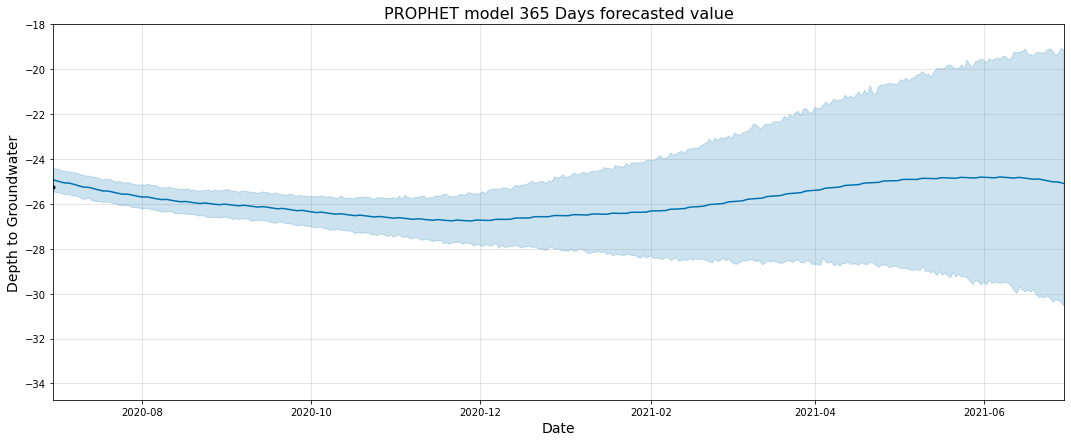

In [79]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(forecast, ax=ax)
ax.set_xlim(pd.to_datetime(['2020-06-30', '2021-06-30']))
#ax.set_ylim(-36, -18) 

ax.set_title('PROPHET model 365 Days forecasted value',fontsize=16)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Depth to Groundwater', fontsize=14)
plt.savefig('image/Figure34. Depth_to_Groundwater_P241.png', format='png') 
plt.show()

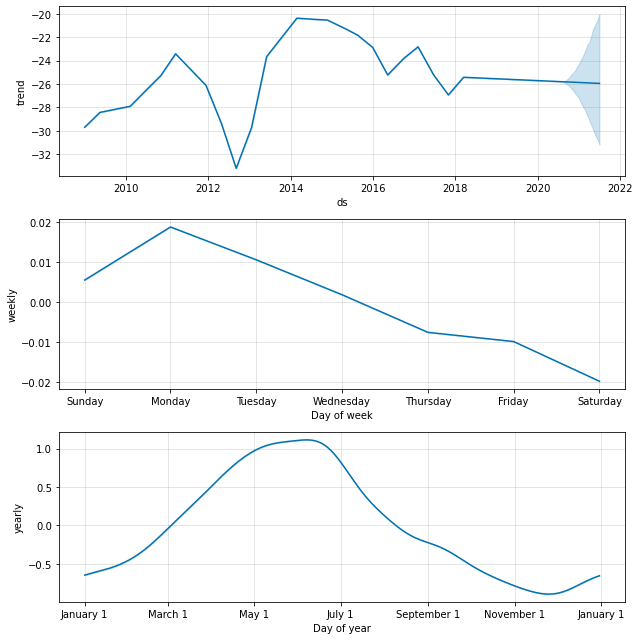

In [80]:
model.plot_components(forecast)
plt.savefig('image/Figure35. Depth_to_Groundwater_P241.png', format='png') 

An interactive figure of the forecast and components can be created with plotly.
The plot above provides interesting insights. The first plot shows the trend.The second plot highlights the fact that the weekly that water labelgoes up on monday and goes down on saturday, while the third plot shows that lebel goes up i  month of may to june.

### Model evaluation result

|  Model  |  MAE	|  RMSE 	| R_square |
| ---: | :--- | :--- | :--- |
| ARIMA | 0.5571 | 0.6505 | 0.2182
| Prophet | 0.4172 | 0.4979 | 0.5420


### Reference

**Here are some additional resources that helped me learn about time series**

https://facebook.github.io/prophet/docs/quick_start.html#python-api

https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://medium.com/@cmukesh8688/why-is-augmented-dickey-fuller-test-adf-test-so-important-in-time-series-analysis-6fc97c6be2f0

#### Useful Libraries

https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [81]:
import os
datapath = 'RawData'
# renaming the output data directory and re-running this notebook, for example,
# will recreate this (empty) directory and resave the data files.
# NB this is not a substitute for a modern data pipeline, for which there are
# various tools. However, for our purposes here, and often in a "one off" analysis,
# this is useful because we have to deliberately move/delete our data in order
# to overwrite it.
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [82]:
datapath_df = os.path.join(datapath, 'df_step2_features.csv')

print(datapath_df)
if not os.path.exists(datapath_df):
    df.to_csv(datapath_df, index=False)

RawData\df_step2_features.csv
